<a href="https://colab.research.google.com/github/harihardiyan/tdgl-gl-benchmark/blob/main/notebooks/Multi%E2%80%91Vortex_128%C3%97128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/harihardiyan/tdgl-gl-benchmark.git
%cd tdgl-gl-benchmark

!pip install -r requirements.txt --quiet

Cloning into 'tdgl-gl-benchmark'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 56 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 235.12 KiB | 6.19 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/tdgl-gl-benchmark


In [2]:

from tdgl_core import (
    init_params_basic,
    init_state_random,
    tdgl_step,
    total_energy,
    to_complex,
)

from tdgl_core.observables import (
    detect_vortices_phase_winding,
)

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:

# Multi-Vortex State (128x128)

Larger system size to visualize richer vortex patterns
under a stronger external magnetic field.

In [3]:

nx = ny = 128
B0 = 0.30   # same field as notebook 02, larger system

params = init_params_basic(nx=nx, ny=ny, B0=B0)
state = init_state_random(params, noise=0.3)

In [4]:

steps = 2500
dt = 0.01

for i in range(steps):
    state = tdgl_step(state, params, dt)

psi = to_complex(state.psi)
dens = jnp.abs(psi)**2
E = total_energy(state, params)

print("Final energy:", float(E))

Final energy: 46.251625061035156


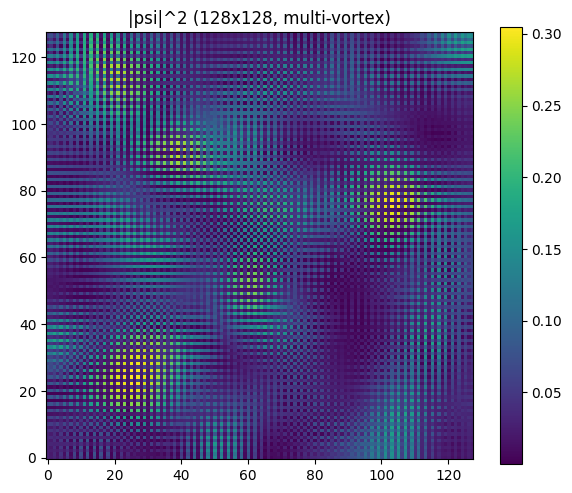

In [5]:

plt.figure(figsize=(6,5))
plt.imshow(dens, origin="lower", cmap="viridis")
plt.colorbar()
plt.title("|psi|^2 (128x128, multi-vortex)")
plt.tight_layout()
plt.show()

In [6]:

vort_mask = detect_vortices_phase_winding(psi)

num_pos = int(jnp.sum(vort_mask == 1))
num_neg = int(jnp.sum(vort_mask == -1))

print("Positive vortices:", num_pos)
print("Negative vortices:", num_neg)

Positive vortices: 750
Negative vortices: 749


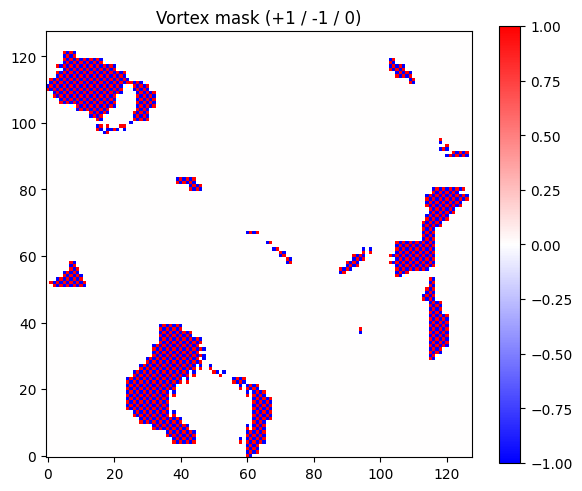

In [7]:

plt.figure(figsize=(6,5))
plt.imshow(vort_mask, origin="lower", cmap="bwr")
plt.colorbar()
plt.title("Vortex mask (+1 / -1 / 0)")
plt.tight_layout()
plt.show()

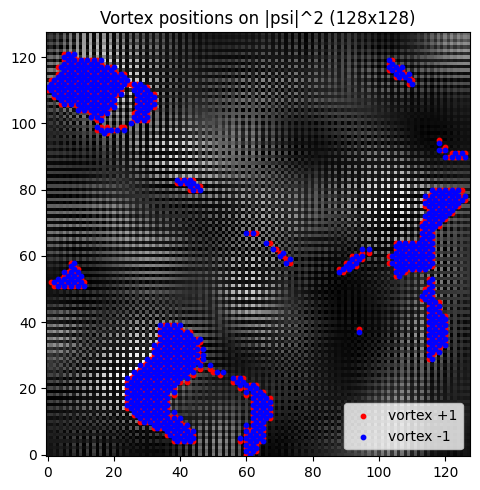

In [8]:

pos_coords = jnp.argwhere(vort_mask == 1)
neg_coords = jnp.argwhere(vort_mask == -1)

plt.figure(figsize=(6,5))
plt.imshow(dens, origin="lower", cmap="gray")
if pos_coords.shape[0] > 0:
    plt.scatter(pos_coords[:,1], pos_coords[:,0],
                s=10, c="red", label="vortex +1")
if neg_coords.shape[0] > 0:
    plt.scatter(neg_coords[:,1], neg_coords[:,0],
                s=10, c="blue", label="vortex -1")
plt.legend()
plt.title("Vortex positions on |psi|^2 (128x128)")
plt.tight_layout()
plt.show()

In [9]:

print("=== Multi-Vortex 128x128 Summary ===")
print("Grid:", nx, "x", ny)
print("External field B0:", B0)
print("Energy:", float(E))
print("Vortex count (+1):", num_pos)
print("Vortex count (-1):", num_neg)

=== Multi-Vortex 128x128 Summary ===
Grid: 128 x 128
External field B0: 0.3
Energy: 46.251625061035156
Vortex count (+1): 750
Vortex count (-1): 749
